In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data
file_path = 'data/'+'av_auditory_dur_estimate_bin_stair_2025-02-17_22h23.26.857.csv'
#'lc_auditory_dur_estimate_bin_stair_2025-02-12_18h28.56.655.csv'
#lc_001_auditory_dur_estimate_bin_stair_2025-02-10_18h53.59.765.csv'
#ln_001_auditory_dur_estimate_bin_stair_2025-02-07_12h45.18.556.csv'
#oy_001_auditory_dur_estimate_bin_stair_2025-02-07_00h02.46.951.csv'
#_auditory_dur_estimate_2025-01-26_01h24.23.874.csv'
#_auditory_dur_estimate_2025-01-25_23h28.04.509.csv'
#_auditory_dur_estimate_2025-01-25_14h43.56.151.csv'
#_auditory_dur_estimate_2025-01-22_20h53.18.927.csv'
#_auditory_dur_estimate_2025-01-22_22h53.13.975.csv'
#_auditory_dur_estimate_2025-01-22_20h53.18.927.csv'
#_auditory_dur_estimate_2025-01-22_16h43.58.121.csv'
#_auditory_dur_estimate_2025-01-14_20h43.21.525.csv'
#_auditory_dur_estimate_2025-01-08_16h34.13.197.csv'
#_auditory_dur_estimate_2025-01-08_16h34.13.197.csv'
#_auditory_dur_estimate_2024-12-19_01h06.07.475.csv'
data = pd.read_csv(file_path)
data['chose_test'] = (data['responses'] == data['order']).astype(int)

grouped = data.groupby(['delta_dur_percents', 'rise_dur', 'standard_dur']).agg(
    num_of_chose_test=('chose_test', 'sum'),
    total_responses=('responses', 'count'),
).reset_index()

# p_choose_test
grouped['p_choose_test'] = grouped['num_of_chose_test'] / grouped['total_responses']
#sort the group
grouped = grouped.sort_values([ 'standard_dur'])
grouped

,delta_dur_percents,rise_dur,standard_dur,num_of_chose_test,total_responses,p_choose_test
0,-0.850,0.10,0.5,0,1,0.000000
52,0.314,0.10,0.5,1,2,0.500000
51,0.294,0.85,0.5,5,5,1.000000
50,0.294,0.10,0.5,6,7,0.857143
49,0.250,0.10,0.5,1,2,0.500000
...,...,...,...,...,...,...
22,-0.402,0.85,0.5,1,6,0.166667
21,-0.402,0.10,0.5,0,1,0.000000
20,-0.409,0.85,0.5,1,2,0.500000
18,-0.450,0.85,0.5,0,1,0.000000


In [4]:
import psignifit as ps
from psignifit import psigniplot

In [5]:
data_filtered = data[data['rise_dur'] == 0.5]
grouped_filtered = grouped[grouped['rise_dur'] == 0.5]
res_05=ps.psignifit(grouped_filtered[['delta_dur_percents', 'num_of_chose_test', 'total_responses']], experiment_type='equal asymptote')


ValueError: zero-size array to reduction operation maximum which has no identity

In [6]:

data_filtered = data[data['rise_dur'] == 5.0]
grouped_filtered = grouped[grouped['rise_dur'] == 5.0]
res_35=ps.psignifit(grouped_filtered[['delta_dur_percents', 'num_of_chose_test', 'total_responses']], experiment_type='equal asymptote')

ValueError: zero-size array to reduction operation maximum which has no identity

In [7]:
# Plot psychometric function
plt.figure()
psigniplot.plot_psychometric_function(res_005, plot_data=False, line_color='blue', data_color='b') # label rise duration = 0.1
psigniplot.plot_psychometric_function(res_02, plot_data=False, line_color='red', data_color='r') # label rise duration = 0.2

# Customize plot
plt.title('Psychometric Function (P(Test Longer))')
plt.axhline(0.5, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')

plt.xlabel('Delta Duration (s)')
plt.ylabel('P(Test Longer)')

handles =[plt.Line2D([0], [0], color='blue', label='Amp Var = 0.05'),
            plt.Line2D([0], [0], color='red', label='Amp Var = 0.2')]
plt.legend(handles=handles)
plt.show()

NameError: name 'res_005' is not defined

<Figure size 640x480 with 0 Axes>

            count      mean       std   min      25%   50%    75%   max
is_correct                                                             
False        40.0 -0.040175  0.422592 -0.80 -0.33975 -0.05  0.261  0.80
True        168.0 -0.012613  0.531793 -0.85 -0.49375  0.05  0.448  0.85


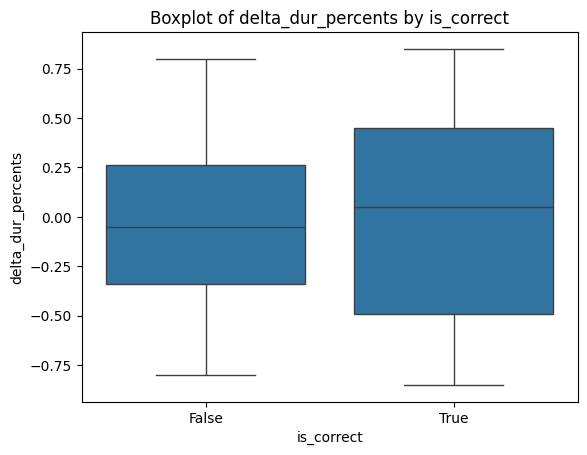

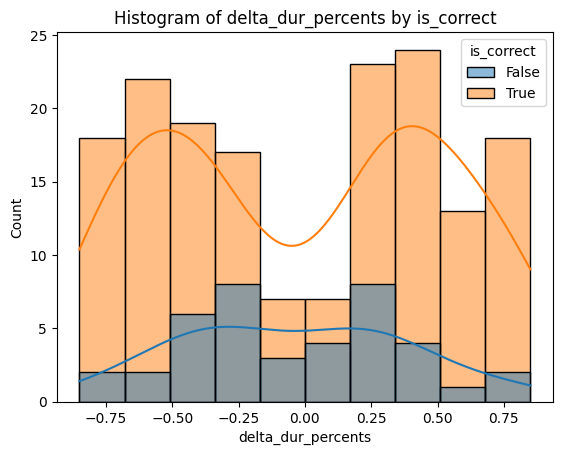

T-test: t_stat=0.35, p_value=0.7262


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


# Summary statistics
summary = data.groupby('is_correct')['delta_dur_percents'].describe()
print(summary)

# Visualizations
sns.boxplot(x='is_correct', y='delta_dur_percents', data=data)
plt.title('Boxplot of delta_dur_percents by is_correct')
plt.show()

sns.histplot(data, x='delta_dur_percents', hue='is_correct', kde=True, bins=10)
plt.title('Histogram of delta_dur_percents by is_correct')
plt.show()

# T-test
group_true = data[data['is_correct'] == True]['delta_dur_percents']
group_false = data[data['is_correct'] == False]['delta_dur_percents']

t_stat, p_value = ttest_ind(group_true, group_false, equal_var=False)
print(f"T-test: t_stat={t_stat:.2f}, p_value={p_value:.4f}")


In [12]:
data[data['rise_dur']==0.1]["response_rts"]

0      0.388
1      0.261
2      0.266
3      0.321
4      0.266
       ...  
198    0.257
199    0.299
202    1.873
206    0.389
207    0.210
Name: response_rts, Length: 104, dtype: float64

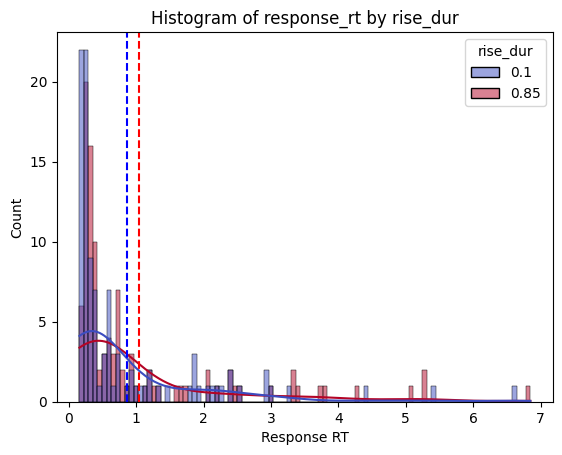

In [14]:
data
sns.histplot(data, x='response_rts', hue='rise_dur', kde=True, bins=100, palette='coolwarm')
# vertical line on mean
plt.axvline(data[data['rise_dur']==0.1]["response_rts"].mean(), color='b', linestyle='--')
plt.axvline(data[data['rise_dur']==0.85]["response_rts"].mean(), color='r', linestyle='--')

plt.title('Histogram of response_rt by rise_dur')
plt.xlabel('Response RT')
plt.ylabel('Count')
plt.show()